# Sentiment & Wordcloud Analysis.
### Using TextBlob.

## Data:-  Twitter Data. <br> Topic:- Corona Virus.

In [1]:
# Installing the library to fetch Tweets
#!pip install tweepy

In [2]:
# Variables for user credentials to access Twitter API
access_token = "1399819700457017345-K9Hhc0tfURvgRd4NNhQvej7YW3ReSs"
access_token_secret = "hUl3ANuYhrgJxYNwT2ML5weSsDC7oOEPEqYpKYOcpz0w3"
consumer_key = "qpLmZbupMFUV0qJyYdWOjoJNG"
consumer_secret = "0ltT1eyYKTxFcQJgma945JrJKJYJgQiEV8WjnQUg2GRaWY2yeO"

In [3]:
import tweepy
import pandas as pd

# Connecting to twitter using credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Searching about the given keyword in all the latest tweets & pull the data
tweets_data=api.search('corona virus',count=100, lang='en', include_rts=False, tweet_mode="extended",
                      geocode="22.5726,88.3639,100km")
print ("Total number of tweets found: "+ str(len(tweets_data)))


# Creating an empty data frame to store the tweets
tweets = pd.DataFrame()

# Extracting the tweet metadata
for status in tweets_data:
    tweets=tweets.append(status._json, ignore_index=True)

Total number of tweets found: 100


In [26]:
# Looking at the data
tweets.head(2)

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,...,retweeted,source,truncated,user,retweeted_status,extended_entities,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str
0,None,None,Thu Jun 03 13:11:09 +0000 2021,"[26, 161]","{'hashtags': [], 'symbols': [], 'user_mentions...",1.0,0.0,@lucky_koley @iamRashmika No option known to ...,None,1.400440e+18,...,0.0,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 973959199548829696, 'id_str': '97395919...",NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,Thu Jun 03 13:05:57 +0000 2021,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @TheGentleWulf: While its important to stay...,None,1.400439e+18,...,0.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,"{'id': 1348008233584140288, 'id_str': '1348008...",{'created_at': 'Mon May 03 21:23:52 +0000 2021...,NaN,NaN,NaN,NaN,NaN


In [27]:
tweets_data= pd.DataFrame(tweets['full_text'])
tweets_data.head(3)

,full_text
0,@lucky_koley @iamRashmika No option known to ...
1,RT @TheGentleWulf: While its important to stay...
2,RT @TheGentleWulf: While its important to stay...


In [28]:
# Looking at the tweets of few rows.
# Converting the text column as a single.
Tweets_String= str(tweets_data.loc[10:15,'full_text'].values)
Tweets_String

'[\'RT @TheGentleWulf: While its important to stay indoors to be safe from covid, its equally important to look after your mental health...\\n\\nTh…\'\n \'Download our app from Google Play Store and experience easy ordering of medicines. Delivering medicines at your comfort 🤗\\n#tablt #pharmacy #app #vernacular #playstore #medicines #ordernow #downloadapp #virus #pandemic #corona #wb #bihar #odisha #jharkhand #bharat https://t.co/YL7vClLAJe\'\n \'@Atulsharmadubai @SinghNeelmani @narendramodi What can anyone do if Corona continues or any other virus came to this earth. You have to take a decision considering the present situation.\'\n "RT @Akaash1Aj: 🔰Chinese scientists made corona virus in Wuhan\'s lab, sensational claim made in new study 🤷\\u200d♂️\\n#चीनी_वायरस_से_विश्व_बर्बाद 😡…"\n \'RT @Akaash1Aj: 🔰Claim in US intelligence report regarding Corona, 👉🏻about 1 month before the virus spread, the staff of Wuhan Lab was ill.…\'\n \'RT @Akaash1Aj: 🔰Work in lab for 5-6 years, 👉🏻trial in Wu

### There are lot junk in the Data. Like:- Twitter-Handles, Smileys, 'RT' etc..

In [29]:
# Creating a function to clean the data

def Data_Cleaner(Input_Data):

    # Tweet Text cleaning
    import re

    # Removing the twitter usernames from tweet string
    Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Input_Data)

    # Removing the URLS from the tweet string
    Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)

    # removing all the special characters
    #Tweet_Texts_Cleaned = re.sub(r'[?|$|.|!|:|RT]',r' ',Tweet_Texts_Cleaned)

    # Removing everything which is not alphabets except -> (. & ,)
    Tweet_Texts_Cleaned= re.sub(r'[^a-z A-Z . ,]',r'',Tweet_Texts_Cleaned)

    # Removing 'RT' from tweet string
    Tweet_Texts_Cleaned= re.sub(r'[RT]',r' ',Tweet_Texts_Cleaned)

    # Removing extra spaces in the text
    Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

    return(Tweet_Texts_Cleaned)

In [30]:
# Calling the Function & Cleaning the data.
tweets_data['Tweets']= tweets_data['full_text'].apply(Data_Cleaner)
tweets_data.head(3)
#str(tweets_data['Tweets'].values)

,full_text,Tweets
0,@lucky_koley @iamRashmika No option known to ...,No option known to praise you my best love AS...
1,RT @TheGentleWulf: While its important to stay...,While its important to stay indoors to be saf...
2,RT @TheGentleWulf: While its important to stay...,While its important to stay indoors to be saf...


# Sentiment Analysis & Visualization

In [31]:
# Function for Sentiment analysis using NLP

def NLP_Sentiment(inpSentence):
    
    from textblob import TextBlob
    blob= TextBlob(inpSentence)
    
    # accessing the sentiment at the 0th position in ithe result tuple
    SentimenitScore=blob.sentiment[0]
    
    OverallSentiment= ''
    
    if (SentimenitScore<0):
        OverallSentiment= 'Negative'
    elif (SentimenitScore>0.1):
        OverallSentiment= 'Positive'
    else:
        OverallSentiment= 'Neutral'
        
    return(OverallSentiment)

In [32]:
tweets_data['Sentiment']=tweets_data['Tweets'].apply(NLP_Sentiment)

In [33]:
tweets_data.head(3)

,full_text,Tweets,Sentiment
0,@lucky_koley @iamRashmika No option known to ...,No option known to praise you my best love AS...,Positive
1,RT @TheGentleWulf: While its important to stay...,While its important to stay indoors to be saf...,Positive
2,RT @TheGentleWulf: While its important to stay...,While its important to stay indoors to be saf...,Positive


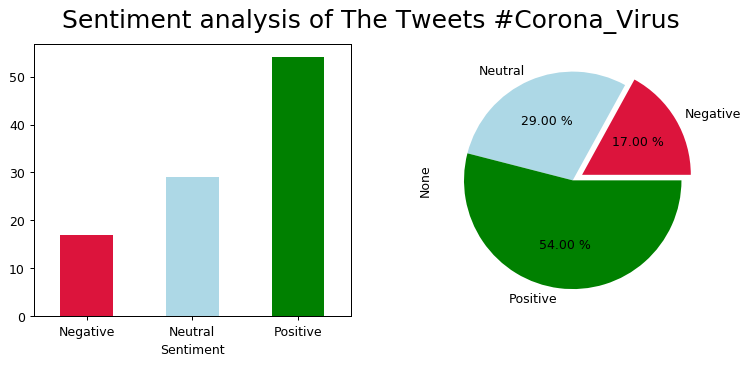

In [34]:
# Visualizing the overall sentiment distribution

import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4),dpi= 90)
fig.suptitle("Sentiment analysis of The Tweets #Corona_Virus",fontsize= 20)

# Grouping the data
#GroupedData=tweets_data['Sentiment'].value_counts()
GroupedData=tweets_data.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson','lightblue', 'green'],rot= 0)
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson','lightblue', 'green'], autopct= '%.2f %%',
                         startangle = 0, explode = (0.1,0.0,0.0))    
plt.show()

# Wordcloud Analysis of the Negative Tweets

In [35]:
#tweets_data[['Tweets','Sentiment']][tweets_data['Sentiment']=='Negative']

Negative_Sentiment= str(tweets_data['Tweets'][tweets_data['Sentiment']=='Negative'].values)
Negative_Sentiment

"[' What can anyone do if Corona continues or any other virus came to this earth. You have to take a decision considering the present situation.'\n ' Claim in US intelligence report regarding Corona, about month before the virus spread, the staff of Wuhan Lab was ill.'\n 'Claim in US intelligence report regarding Corona, about month before the virus spread, the staff of Wuhan Lab was ill. '\n ' new symptoms of new type of corona virus.Dont be afraid, be careful, if these symptoms occur consult a doctor. WeShallOvercome ogether UniteFightCorona IndiaFightsForCoronavirus Kolkatax UNICEF GovtofIndia govtofwestbengal CoronavirusPandemic ABPnews '\n ' Corona is a deadly chinese virus for rest of the world but for MODI haters its an opportunity. espect little contribution.'\n ' All Indians are watching when Modi were trying to fight against corona virus nd wave.. On the same side opposition were playing there dirty politic tricks... '\n ' NEE U and CO should be removed immediately from our E

In [36]:
# Finding the important word combinations using textblob
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(Negative_Sentiment)

# Finding the noun phrases (important keywords combination) in the text, to understand what entities are being talked about
NounPhrases=SampleTextInBlobFormat.noun_phrases

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Splitting the text to make list of words
#WordList=str(NewNounList).split()    

In [37]:
# Looking at the Few noun_phrases
NewNounList[1:6]

['present_situation', 'claim', 'us_intelligence_report', 'corona', 'wuhan_lab']

In [38]:
# Finding out the frequency of Top 10 words in text

# Creating a Dataframe
WordData=pd.DataFrame(data= pd.Series(NewNounList), columns=['words'])

# Finding the top frequency words
print(WordData.groupby('words').size().nlargest(15))

words
corona                          9
corona_virus                    3
doubt_regards_corona_virus..    2
guinea                          2
hello_dr                        2
india                           2
modi                            2
please                          2
us_intelligence_report          2
wuhan_lab                       2
'corona_virus                   1
afraid                          1
allopathy_dont                  1
chinese_vi                      1
chinese_virus                   1
dtype: int64


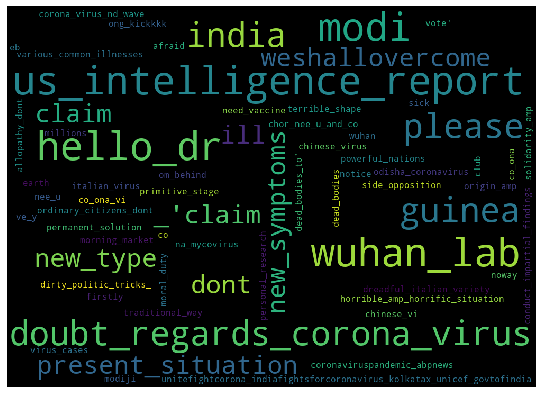

In [39]:
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
#print('##### Important word combinations ####')
#print(NewNounString)

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['corona_virus','corona']

wordcloudimage = WordCloud( max_words=100,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Pranab Kumar Paul.